In [1]:
import numpy as np
from qiskit import *

In [2]:
from qiskit.circuit import Gate
%matplotlib inline
my_gate = Gate(name='my_gate', num_qubits=2, params=[])


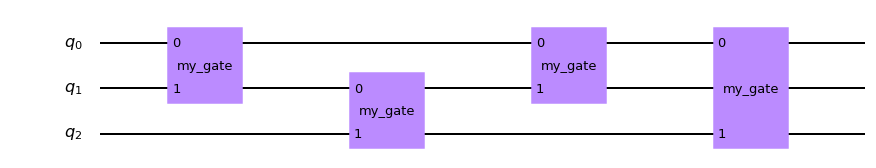

In [3]:
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[0], qr[2]])

circ.draw('mpl')

In [11]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])

In [13]:
sub_circ.draw()

┌───┐          ░ ┌────────────┐
q1_0: ┤ H ├────■─────░─┤ U3(1,2,-2) ├
      └───┘┌───┴───┐ ░ └───┬───┬────┘
q1_1: ─────┤ RZ(1) ├─░─────┤ I ├─────
           └───────┘ ░     └───┘

In [9]:
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()


┌───┐                       
q_0: ┤ H ├──■────────────────────
     └───┘┌─┴─┐     ┌───────────┐
q_1: ─────┤ X ├──■──┤0          ├
          └───┘┌─┴─┐│  sub_circ │
q_2: ──────────┤ X ├┤1          ├
               └───┘└───────────┘

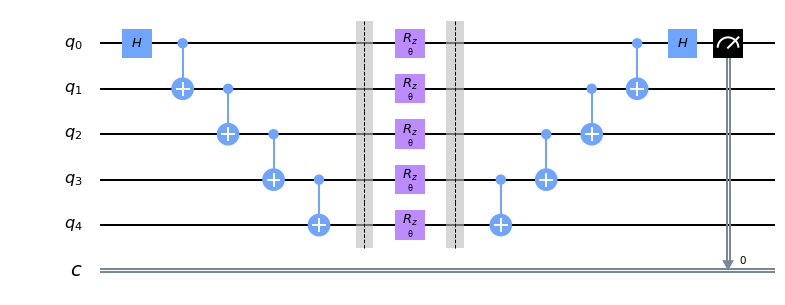

In [14]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

In [15]:
print(qc.parameters)

{Parameter(θ)}


In [31]:
import numpy as np


theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

┌───┐                     ░ ┌─────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ RZ(2pi) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├─────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ RZ(2pi) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├─────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ RZ(2pi) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├─────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ RZ(2pi) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├─────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ RZ(2pi) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └─────────┘ ░ └───┘                     ║ 
c_0: ════════════════════════════════════════════════════════════════════╩═

In [21]:
job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range])

counts = job.result().get_counts()

In [33]:
print(len(counts))

128


In [35]:
print(counts)

[{'0': 1024}, {'0': 1010, '1': 14}, {'0': 960, '1': 64}, {'0': 887, '1': 137}, {'0': 796, '1': 228}, {'0': 669, '1': 355}, {'0': 530, '1': 494}, {'0': 405, '1': 619}, {'0': 312, '1': 712}, {'0': 197, '1': 827}, {'0': 109, '1': 915}, {'0': 53, '1': 971}, {'0': 8, '1': 1016}, {'0': 2, '1': 1022}, {'0': 26, '1': 998}, {'0': 69, '1': 955}, {'0': 158, '1': 866}, {'0': 240, '1': 784}, {'0': 382, '1': 642}, {'0': 498, '1': 526}, {'0': 632, '1': 392}, {'0': 739, '1': 285}, {'0': 855, '1': 169}, {'0': 934, '1': 90}, {'0': 990, '1': 34}, {'0': 1022, '1': 2}, {'0': 1017, '1': 7}, {'0': 982, '1': 42}, {'0': 917, '1': 107}, {'0': 821, '1': 203}, {'0': 737, '1': 287}, {'0': 589, '1': 435}, {'0': 467, '1': 557}, {'0': 319, '1': 705}, {'0': 228, '1': 796}, {'0': 129, '1': 895}, {'0': 78, '1': 946}, {'0': 19, '1': 1005}, {'1': 1024}, {'0': 19, '1': 1005}, {'0': 74, '1': 950}, {'0': 138, '1': 886}, {'0': 216, '1': 808}, {'0': 365, '1': 659}, {'0': 440, '1': 584}, {'0': 572, '1': 452}, {'0': 708, '1': 31

In [37]:
128*(32/4)

1024.0

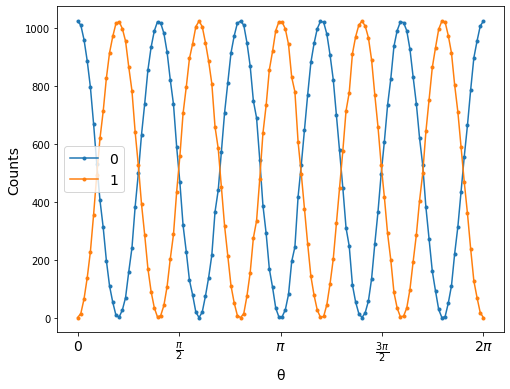

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)